# Reasons (not DK)

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('../data/reasons.csv')

In [3]:
reason_translation = {
    "Andet": "Other",
    "Jeg ved ikke rigtig, hvad der er at se i Danmark": "I don't really know what there is to see in Denmark",
    "Jeg har besøgt venner eller familie i udlandet": "I have visited friends or family abroad",
    "Jeg foretrækker at holde ferie andre steder end Danmark": "I prefer to vacation elsewhere than Denmark",
    "Jeg vil gerne opleve nye smagsoplevelser i mine ferier, og som jeg ikke kan få i Danmark": "I want to experience new tastes in my vacations that I can't get in Denmark",
    "Jeg får mere værdi for pengene ved at holde ferie i udlandet": "I get more value for money by vacationing abroad",
    "Det var tilfældigt, at jeg ikke holdt ferie i Danmark": "It was by chance that I didn't vacation in Denmark",
    "Det minder for meget om hverdagen at holde ferie i Danmark": "It feels too much like everyday life to vacation in Denmark",
    "Jeg vil gerne opleve en anden natur, end den der er i Danmark": "I want to experience a different nature than what's in Denmark",
    "Vejret i Danmark er for ustadigt – der er fx ingen sol- eller varmegaranti om sommeren": "The weather in Denmark is too unstable",
    "Jeg vil gerne opleve en anden kultur i mine ferier": "I want to experience a different culture in my vacations"
}

# Example of using the dictionary
data['Reason'] = data['Begrundelse'].map(reason_translation)

In [4]:
data = data[['Reason', 'Proportion']]

In [5]:
data = data.sort_values(by='Proportion', ascending=False)

/var/folders/_6/l3776shn2kq8j4f7hm3qr5bh0000gn/T/ipykernel_59755/2113293946.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  tab20 = cm.get_cmap('tab20')


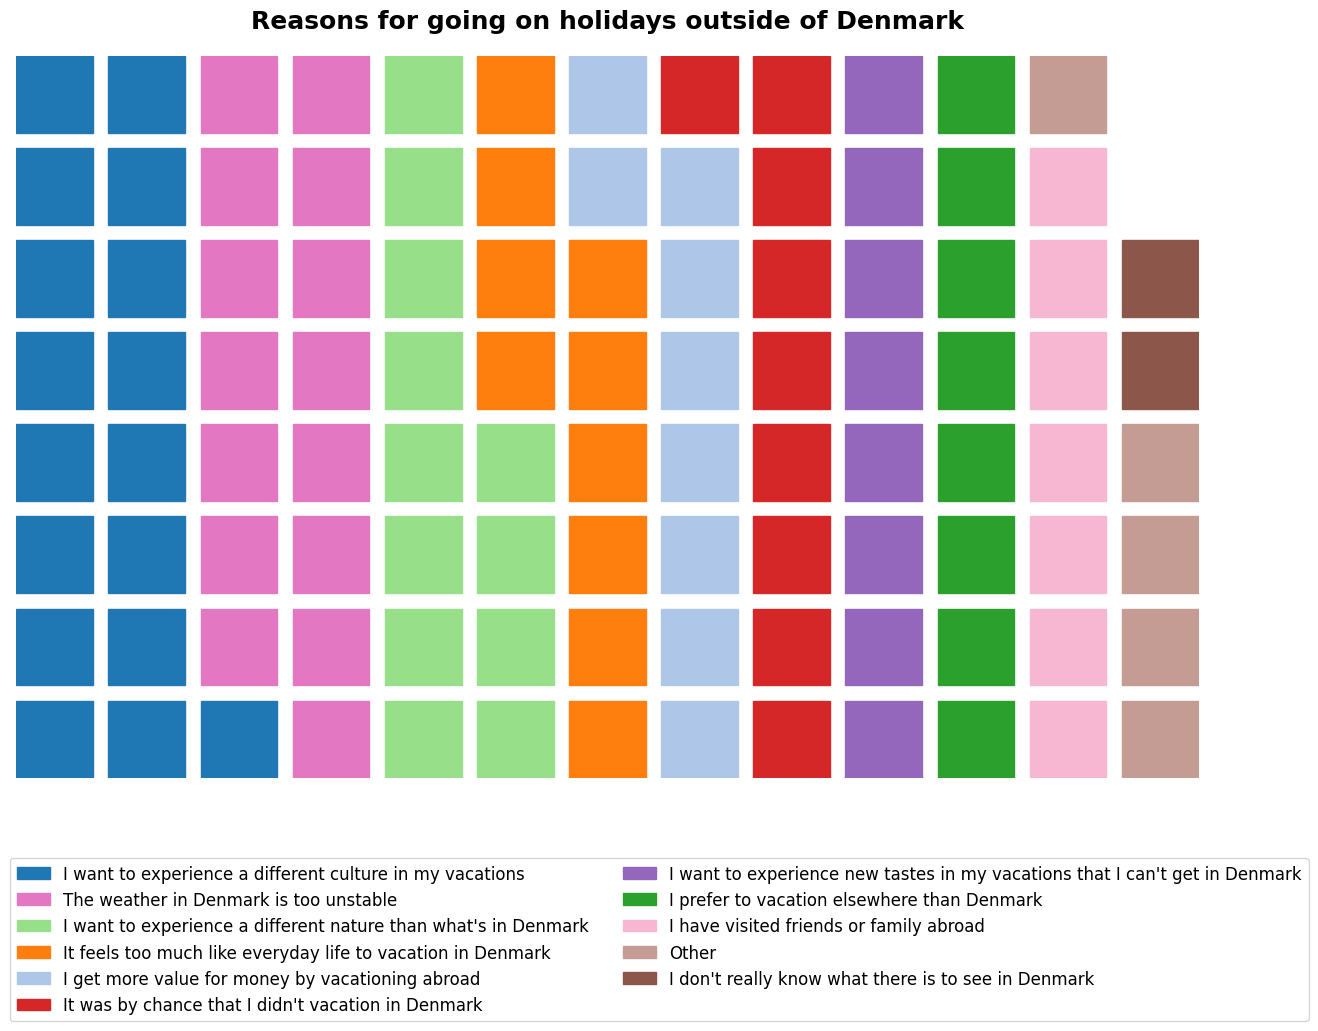

In [6]:
from pywaffle import Waffle
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import rgb2hex
import numpy as np

# Assuming 'data' is a DataFrame with 'Reason' and 'Proportion' columns
total_blocks = 100
data['Values'] = (data['Proportion'] * total_blocks).astype(int)

# Create dictionary for plotting
waffle_data = dict(zip(data['Reason'], data['Values']))

# Generate a muted color palette using a matplotlib colormap
# Let's use 'Set2' which is a nice soft, muted categorical palette
tab20 = cm.get_cmap('tab20')
desired_indices = [0, 12, 5, 2, 1, 6, 8, 4, 13, 11, 10]
colors = [rgb2hex(tab20(i / 19)) for i in desired_indices]


# Plotting the Waffle Chart
plt.figure(
    figsize=(20, 10),
    FigureClass=Waffle,
    rows=8,  # 4 rows of blocks
    columns=13,  # 25 columns of blocks
    values=waffle_data,
    colors=colors,  # Applying muted colors to the waffle blocks
    legend={'bbox_to_anchor': (1.1, -0.1), 'ncol': 2, 'fontsize':12},  # Position the legend outside the chart
)
plt.tight_layout()
plt.title('Reasons for going on holidays outside of Denmark', fontsize=18, fontweight='bold', pad=20)
plt.savefig('../assets_own/images/vacation_reason.png')
plt.show()
# Overskrift.
# Beskrivelse.
# Bedre farver. x

# Destination

In [7]:
import pandas as pd
import numpy as np

In [8]:
data = pd.read_csv('../data/destinations.csv', sep=';', header=None).iloc[:,1:]

In [9]:
years = [f'20{i:02d}' for i in range(1, 24)]
data.columns = ['Lande'] + years

In [10]:
country_mapping = {
    'Belgien': 'Belgium',
    'Bulgarien': 'Bulgaria',
    'Cypern': 'Cyprus',
    'Estland': 'Estonia',
    'Finland': 'Finland',
    'Frankrig': 'France',
    'Færøerne': 'Faroe Islands',
    'Grækenland': 'Greece',
    'Grønland': 'Greenland',
    'Irland': 'Ireland',
    'Island': 'Iceland',
    'Italien': 'Italy',
    'Letland': 'Latvia',
    'Litauen': 'Lithuania',
    'Luxembourg': 'Luxembourg',
    'Malta': 'Malta',
    'Nederlandene': 'Netherlands',
    'Polen': 'Poland',
    'Portugal': 'Portugal',
    'Rumænien': 'Romania',
    'Rusland': 'Russia',
    'Schweiz': 'Switzerland',
    'Slovakiet': 'Slovakia',
    'Slovenien': 'Slovenia',
    'Spanien': 'Spain',
    'Storbritannien': 'UK',
    'Sverige': 'Sweden',
    'Norge': 'Norway',
    'Tjekkiet': 'Czech Republic',
    'Tyrkiet': 'Turkey',
    'Tyskland': 'Germany',
    'Ukraine': 'Ukraine',
    'Ungarn': 'Hungary',
    'Østrig': 'Austria',
    'Europa i øvrigt': 'Other Europe',
    'Sydafrika': 'South Africa',
    'Afrika uden Sydafrika': 'Other Africa',
    'Brasilien': 'Brazil',
    'Canada': 'Canada',
    'USA': 'USA',
    'Syd- og Mellemamerika uden Brasilien': 'Other South America',
    'Indien': 'India',
    'Japan': 'Japan',
    'Kina': 'China',
    'Sydkorea': 'South Korea',
    'Thailand': 'Thailand',
    'Asien uden Kina, Japan, Sydkorea, Indien og Thailand': 'Other Asia',
    'Australien': 'Australia',
    'Oceanien uden Australien': 'Oceania excluding Australia',
    'Uoplyst land': 'Unspecified country'
}

data['Country'] = data['Lande'].map(country_mapping)

In [11]:
continent_mapping = {
    # Europe
    'Belgium': 'Europe', 'Bulgaria': 'Europe', 'Cyprus': 'Europe',
    'Estonia': 'Europe', 'Finland': 'Europe', 'France': 'Europe',
    'Faroe Islands': 'Europe', 'Greece': 'Europe', 'Greenland': 'Europe',  
    'Ireland': 'Europe', 'Iceland': 'Europe', 'Italy': 'Europe',
    'Latvia': 'Europe', 'Lithuania': 'Europe', 'Luxembourg': 'Europe',
    'Malta': 'Europe', 'Netherlands': 'Europe', 'Poland': 'Europe',
    'Portugal': 'Europe', 'Romania': 'Europe', 'Russia': 'Asia',  
    'Switzerland': 'Europe', 'Slovakia': 'Europe', 'Slovenia': 'Europe',
    'Spain': 'Europe', 'UK': 'Europe', 'Sweden': 'Europe',
    'Norway': 'Europe', 'Czech Republic': 'Europe', 'Turkey': 'Europe',  
    'Germany': 'Europe', 'Ukraine': 'Europe', 'Hungary': 'Europe',
    'Austria': 'Europe', 'Other Europe': 'Europe',
    
    # Africa
    'South Africa': 'Africa', 'Other Africa': 'Africa',
    
    # Americas
    'Brazil': 'South America', 'Canada': 'North America', 'USA': 'North America',
    'Other South America': 'South America',
    
    # Asia
    'India': 'Asia', 'Japan': 'Asia', 'China': 'Asia',
    'South Korea': 'Asia', 'Thailand': 'Asia',
    'Other Asia': 'Asia',
    
    # Oceania
    'Australia': 'Oceania', 'Oceania excluding Australia': 'Oceania',
    
    # Other
    'Unspecified country': 'Unknown'
}

data['Continent'] = data['Country'].map(continent_mapping)


In [12]:
color_discrete_map = {
    # Europe
    '(?)': 'lightgrey',
    'Belgium': '#b9a394',        # dusty cocoa
    'Bulgaria': '#c9bca0',       # pale sand
    'Cyprus': '#d3a87c',         # dusty apricot
    'Estonia': '#8da7c4',        # muted steel blue
    'Finland': '#9eb1c9',        # soft arctic blue
    'France': '#748cab',         # dusty blue
    'Faroe Islands': '#8ea9b8',  # cool grey blue
    'Greece': '#7a9eab',         # sea slate
    'Greenland': '#d9c8b4',      # icy beige
    'Ireland': '#a2b29f',        # sage green
    'Iceland': '#b5c2bc',        # dusty teal
    'Italy': '#a09998',          # dusty olive
    'Latvia': '#a47160',         # muted russet
    'Lithuania': '#bba77e',      # faded ochre
    'Luxembourg': '#bfb8af',     # light ash
    'Malta': '#b4a19e',          # muted coral grey
    'Netherlands': '#c98474',    # dusty orange
    'Poland': '#c4a69f',         # pale rosewood
    'Portugal': '#d0826a',       # terracotta blush
    'Romania': '#c4b499',        # dusty parchment
    'Russia': '#949e9e',         # grey frost (Asia)
    'Switzerland': '#c56c6c',    # faded alpine red
    'Slovakia': '#b6b9c1',       # muted blue-grey
    'Slovenia': '#bfb6a3',       # stone beige
    'Spain': '#c05a5a',          # dusty red
    'UK': '#7e8b99',             # foggy navy
    'Sweden': '#a3b4a2',         # forest mist
    'Norway': '#9ba8aa',         # pine grey
    'Czech Republic': '#a89888', # dusty taupe
    'Turkey': '#c67f7f',         # faded terracotta
    'Germany': '#9e8c88',        # muted brown-grey
    'Ukraine': '#d0b562',        # wheat gold
    'Hungary': '#a78277',        # soft brick
    'Austria': '#c7a49c',        # faded blush
    'Other Europe': '#d6c8bb',   # light beige

    # Africa
    'South Africa': '#998f7b',       # earthy khaki
    'Other Africa': '#c6bfa2',       # dry savanna

    # Americas
    'Brazil': '#86a96f',             # dusty green
    'Canada': '#a16b5a',             # faded maple
    'USA': '#7a8690',                # grey denim
    'Other South America': '#b68265',# sunset clay

    # Asia
    'India': '#c29c5d',              # saffron dust
    'Japan': '#a68c94',              # muted sakura
    'China': '#b27c6d',              # dusty rose
    'South Korea': '#8ca0a5',        # cloudy grey-blue
    'Thailand': '#bda188',           # sepia cream
    'Other Asia': '#cabba5',         # parchment

    # Oceania
    'Australia': '#b29e8e',          # outback clay
    'Oceania excluding Australia': '#c2b39c',  # pale tan
}


In [13]:
data = data[['Country', 'Continent'] + years]
data = data.replace('..', 0)
data[years] = data[years].astype(int)

In [14]:
data

,Country,Continent,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Belgium,Europe,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,1
1,Bulgaria,Europe,0,0,0,0,0,0,2,1,...,1,0,1,1,2,1,1,1,0,0
2,Cyprus,Europe,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,2,1,0,1
3,Estonia,Europe,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Finland,Europe,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
5,France,Europe,13,12,11,8,10,9,9,9,...,6,8,6,5,5,5,4,5,6,7
6,Faroe Islands,Europe,0,0,0,0,0,0,0,0,...,1,1,1,1,0,1,1,2,1,1
7,Greece,Europe,9,8,4,3,5,6,6,5,...,6,5,5,7,8,6,4,11,8,7
8,Greenland,Europe,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
9,Ireland,Europe,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,1,1


In [15]:
import pandas as pd
from squarify import normalize_sizes, squarify

from bokeh.plotting import figure, show
from bokeh.transform import factor_cmap

data = data[['Country', 'Continent', '2023']]
data = data[data['2023'] != 0]
continents = data['Continent'].unique()

sales_by_continent = data.groupby("Continent").sum("2023").sort_values(by="2023")

def treemap(df, col, x, y, dx, dy, *, N=100):
    sub_df = df.nlargest(N, col)
    normed = normalize_sizes(sub_df[col], dx, dy)
    blocks = squarify(normed, x, y, dx, dy)
    blocks_df = pd.DataFrame.from_dict(blocks).set_index(sub_df.index)
    return sub_df.join(blocks_df, how='left').reset_index()

x, y, w, h = 0, 0, 800, 450

blocks_by_continent = treemap(sales_by_continent, '2023', x, y, w, h )


dfs = []
for index, (Continent, Popularity, x, y, dx, dy) in blocks_by_continent.iterrows():
    df = data[data.Continent==Continent]
    dfs.append(treemap(df, "2023", x, y, dx, dy, N=10))
blocks = pd.concat(dfs)

In [16]:
color_discrete_map.update({
    'Italy': '#8aa786',         # dusty green (reflecting the green in the flag)
    'Norway': '#a05c63',        # muted red (flag-based, still subdued)
    'Sweden': '#cbb458',        # dusty yellow (flag's yellow in a muted tone)
    'Thailand': '#a184a2',      # dusty purple (aesthetic-friendly alternative)
    'Japan': '#c16868',         # soft red (evokes the red sun, in a dusty hue)
})

In [17]:
import plotly.express as px

fig = px.treemap(
    data, 
    path=['Continent', 'Country'], 
    values='2023',
    color='Country',
    color_discrete_map=color_discrete_map
)

ids = fig.data[0]['ids']
labels = fig.data[0]['labels']
country_to_value = dict(zip(data['Country'], data['2023']))

# Construct hovertemplate per tile
hovertemplate = []
for label, id_ in zip(labels, ids):
    if '/' in id_:  # country node
        val = country_to_value.get(label, "")
        hovertemplate.append(f"<b>{label}</b><br>Proportion of total vacations: {val}%<extra></extra>")
    else:  # continent or root node
        hovertemplate.append(None)  # disables hover

fig.update_traces(
    hovertemplate=hovertemplate,
)

fig.write_html("../assets_own/destinations_treemap.html")
fig.show()

### MISSING TITLE

# Activities

In [18]:
data = pd.read_csv('../data/activities.csv')

In [28]:
import pandas as pd
import plotly.graph_objects as go
import plotly.colors as pc

# Data
data = {
    'Category': [
        "Historical attractions, buildings and sights",
        "Museums and exhibitions",
        "Experience centers and amusement parks",
        "Animal parks, zoos and aquariums",
        "Local food experiences at markets or festivals etc.",
        "Water parks",
        "Concerts, music festivals or theater performances",
        "Other",
        "Sports events",
        "Don't know",
        "None of the above"
    ],
    'Denmark': [0.37, 0.32, 0.18, 0.17, 0.15, 0.11, 0.07, 0.06, 0.03, 0.02, 0.24],
    'World': [0.53, 0.34, 0.09, 0.09, 0.33, 0.07, 0.06, 0.08, 0.04, 0.01, 0.18]
}

df = pd.DataFrame(data)

# Normalize each country's values
df['Denmark'] = df['Denmark'] / df['Denmark'].sum()
df['World'] = df['World'] / df['World'].sum()

# Use a soft pastel color scale
colors = pc.qualitative.Prism
while len(colors) < len(df):  # Repeat colors if not enough
    colors += colors

# Create figure
fig = go.Figure()

# Add a bar for each category
for i, row in df.iterrows():
    fig.add_trace(go.Bar(
        y=['Denmark', 'World'],
        x=[row['Denmark'], row['World']],
        name=row['Category'],
        orientation='h',
        marker_color=colors[i],
        hovertemplate=f"<b>{row['Category']}</b><br>Popularity: %{{x:.0%}}<extra></extra>"
    ))

# Update layout
fig.update_layout(
    barmode='stack',
    title='Holiday Activities: Denmark vs. World',
    xaxis=dict(title='Proportion', tickformat='.0%'),
    yaxis=dict(categoryorder='array', categoryarray=['Denmark', 'World']),
    # legend=dict(
    #     orientation='v',
    #     yanchor='bottom',
    #     y=-0.6,
    #     xanchor='center',
    #     x=0.5,
    #     font=dict(size=10),
    #     traceorder='normal',
    #     itemwidth=80,
    #     itemsizing='constant'
    # ),
    # legend_itemclick=False,
    # legend_itemdoubleclick=False,
    showlegend=False,
    height=600
)
fig.write_html("../assets_own/activities_proportions.html", full_html=False, include_plotlyjs='cdn')
fig.show()
